<a href="https://colab.research.google.com/github/abirami1998/CNN_CIFAR/blob/master/CNN_for_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

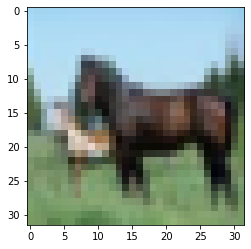

In [8]:
plt.imshow(x_train[12])

In [9]:
x_train.max()

255

In [0]:
x_train=x_train/255
x_test=x_test/255

In [12]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
from keras.utils import to_categorical

In [0]:
y_cat_train=to_categorical(y_train,10)

In [0]:
y_cat_test=to_categorical(y_test,10)

In [0]:
from tensorflow.keras.models import Sequential

In [0]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [0]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.fit(x_train,y_cat_train,epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9249 - accuracy: 0.6829
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8458 - accuracy: 0.7109
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7835 - accuracy: 0.7316
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7386 - accuracy: 0.7490
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7003 - accuracy: 0.7640
Epoch 6/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.6666 - accuracy: 0.7750
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.6408 - accuracy: 0.7842
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6178 - accuracy: 0.7943
Epoch 9/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.5998 - accuracy: 0.7991
Epoch 10/10
1563/1563 [==============================] - 58s 37m

In [25]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.4627 - accuracy: 0.6753


[1.462676763534546, 0.6753000020980835]

In [0]:
from sklearn.metrics import classification_report

In [27]:
predictions=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1000
           1       0.81      0.82      0.81      1000
           2       0.46      0.72      0.56      1000
           3       0.59      0.39      0.47      1000
           4       0.69      0.58      0.63      1000
           5       0.56      0.57      0.56      1000
           6       0.87      0.67      0.76      1000
           7       0.64      0.80      0.71      1000
           8       0.79      0.76      0.77      1000
           9       0.82      0.74      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [29]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]])

In [30]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [31]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])